/tmp/ipykernel_69325/626824637.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[f'lag_{i}'] = train_data['price'].shift(i)
/tmp/ipykernel_69325/626824637.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'lag_{i}'] = test_data['price'].shift(i)
/tmp/ipykernel_69325/626824637.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

Mean Squared Error: 55.304061759884966


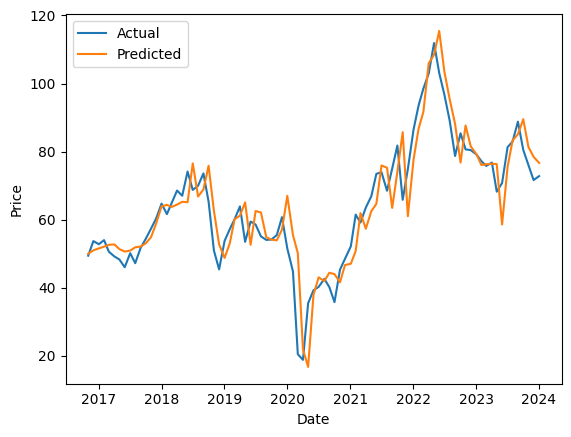

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Reading the data
co_data = pd.read_csv('//home//deepak//4th semester//ML//Project//dataset//crude-oil-price.csv', parse_dates=['date'])

# Selecting required columns
co_data = co_data[['date', 'price']]

# Sorting values by date
co_data = co_data.sort_values(by='date')

# Splitting data into train and test sets
train_size = int(len(co_data) * 0.8)
train_data, test_data = co_data[:train_size], co_data[train_size:]

# Feature engineering: creating lag features
for i in range(1, 13):
    train_data[f'lag_{i}'] = train_data['price'].shift(i)
    test_data[f'lag_{i}'] = test_data['price'].shift(i)

# Drop rows with NaN values resulting from lagging
train_data = train_data.dropna()
test_data = test_data.dropna()

# Prepare data for training
X_train = train_data.drop(['date', 'price'], axis=1)
y_train = train_data['price']
X_test = test_data.drop(['date', 'price'], axis=1)
y_test = test_data['price']

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot actual vs predicted
plt.plot(test_data['date'], y_test, label='Actual')
plt.plot(test_data['date'], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [4]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 5.529221839080453
R-squared: 0.8218055958731156
Root Mean Squared Error: 7.436670072007025


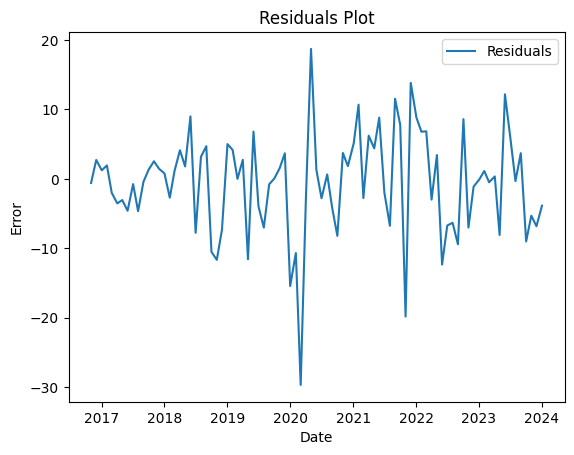

In [5]:
# Calculate residuals
residuals = y_test - y_pred

# Plot the residuals
plt.plot(test_data['date'], residuals, label='Residuals')
plt.xlabel('Date')
plt.ylabel('Error')
plt.legend()
plt.title('Residuals Plot')
plt.show()
